In [659]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42,
    shuffle=False)

In [660]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [661]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=42)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [662]:
import pandas as pd 
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,-0.060101,0.802905,-0.221042,0.069370,0.192597,2.392110,-2.099356,0.683223,-0.114802,0.566772
1,0.173092,-0.900922,-1.579436,-0.817892,0.391209,0.581782,-0.016223,1.156834,0.397397,-0.747456
2,0.152907,0.351335,1.203578,-1.489284,-0.245995,0.446704,0.587058,0.006549,0.542424,-0.808964
3,-1.221291,-1.613671,-0.089234,-0.037571,-1.731201,1.494938,0.041326,0.443002,0.951550,-1.021162
4,0.036849,-1.264263,0.891344,-0.204356,-0.290441,0.444145,0.815754,0.602473,1.040058,-1.018870
...,...,...,...,...,...,...,...,...,...,...
745,-0.004873,-0.161470,0.891304,0.004230,0.618886,1.638360,0.381310,0.311653,-1.518911,-2.630730
746,-1.308476,-1.278945,-0.815376,-1.066235,2.124771,1.331339,1.920368,-1.222895,0.071254,-1.293508
747,-0.259321,0.287089,-1.615887,0.299648,0.932435,-0.415100,0.700701,2.814654,-0.104343,0.393307
748,-1.201226,-1.742594,-1.499016,-0.091845,-0.087435,0.548320,0.949595,-0.059415,1.855503,0.224235


In [663]:
# feature importance 
# feature importance is a measure of how much a feature contributes to the model's prediction
# impurity-based feature importance - se ci sono tanti valori unici, il valore di impurity-based feature importance è più alto, ma potrebbe essere sbagliato or fuorviante

importances = forest.feature_importances_
importances

array([0.12611784, 0.5711449 , 0.04440927, 0.03311521, 0.04251175,
       0.03476126, 0.03691758, 0.03225842, 0.04143411, 0.03732966])

In [664]:
import numpy as np
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.05010482, 0.08746544, 0.02141593, 0.01948477, 0.02346818,
       0.01922708, 0.02052287, 0.01905545, 0.02055053, 0.01857668])

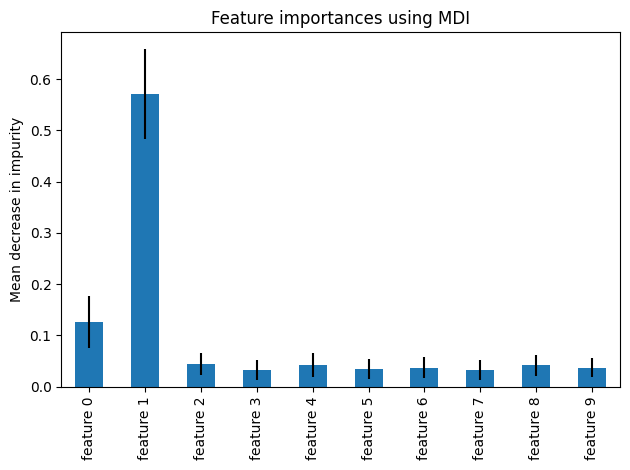

In [665]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI") #MDI: Mean Decrease in Impurity
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [666]:
#Feature importance con feature permutation
# feature permutation importance - si calcola la differenza tra l'accuratezza del modello con tutti i dati e l'accuratezza del modello con i dati di una feature permutati
# feature permutation importance è più affidabile rispetto a impurity-based feature importance quando abbiamo tanti valori univoci

from sklearn.inspection import permutation_importance

res = permutation_importance(forest, X_test, y_test, n_repeats=30, random_state=42)

importances = pd.Series(res.importances_mean, index=feature_names)
importances

feature 0    0.066667
feature 1    0.362400
feature 2   -0.000800
feature 3   -0.002400
feature 4   -0.009333
feature 5   -0.003200
feature 6   -0.004933
feature 7   -0.000400
feature 8   -0.006400
feature 9   -0.002933
dtype: float64

In [667]:
res.importances_std

array([0.01327989, 0.02768586, 0.00454899, 0.00366606, 0.00477028,
       0.00348712, 0.00321386, 0.00215407, 0.00244404, 0.00176887])

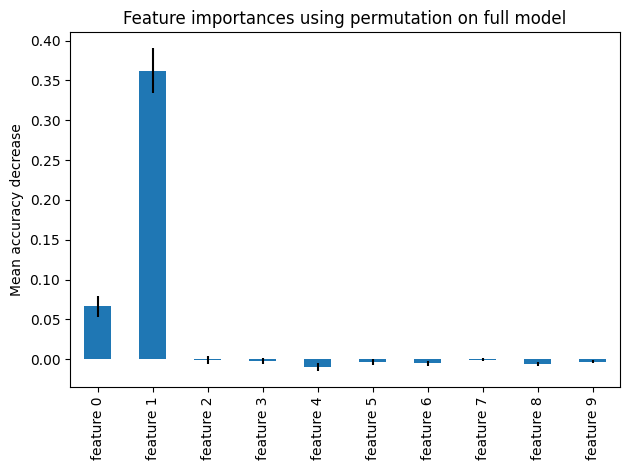

In [668]:
fig, ax = plt.subplots()
importances.plot.bar(yerr=res.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

# Titanic Disaster: Survivability

Studiare i parametri che aiutano a comprendere cosa contribuisce alla sopravvivenza in un caso come quello del Titanic.


## Problema

Usare tecniche di analisi dei dati, grafici, ML, etc. per predire quali metriche contribuiscono alla sopravvivenza dei passeggeri.

In [669]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_titanic_train = pd.read_csv('data/titanic/train.csv')
df_titanic_test = pd.read_csv('data/titanic/test.csv')

In [670]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [671]:
df_titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary

|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Notes

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Dataset Exploration

In [672]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ci sono 891 righe e 12 colonne nel dataset. 11 colonne sono features e 1 (Survived) è il target. 

Delle features, PassengerId non sarà rilevante per la predizione della sopravvivenza.

Abbiamo anche 3 colonne con valori nulli: Age, Cabin e Embarked.
Age potrebbe essere delicata da gestire, quindi lo farò dopo.
Cabin sarà da analizzare un po' più in dettaglio per capire se possiamo estrarre informazioni utili o se eliminare e basta.
Embarked è una feature categorica, quindi la gestirò in modo diverso. Avendo pochi valori nulli, comincerò a vedere se posso inferire i valori mancanti.

### Embarked

In [673]:
df_titanic_train.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [674]:
df_titanic_train[df_titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [675]:
# potenzialmente, le persone che non hanno l'informazione su Embarked potrebbero essere state tutte in una stessa classe, con lo stesso ticket e/o lo stesso cabin.
# verifichiamo se ci sono delle relazioni tra le colonne

df_titanic_train[df_titanic_train['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [676]:
df_titanic_train[df_titanic_train['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [677]:
df_titanic_train[df_titanic_train['Fare'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [678]:
#ok, non ci sono relazioni - questi passeggeri sono saliti insieme.
# possiamo fare un'analisi più approfondita per capire quale sia il porto di imbarco più probabile
first_class = df_titanic_train[df_titanic_train['Pclass'] == 1]
first_class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [679]:
# vediamo se ci sono altri passeggeri con lo stesso cognome
first_class['Surname'] = first_class['Name'].apply(lambda x: x.split(',')[0])
first_class[first_class['Surname'] == 'Stone']

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_12520\1404146658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_class['Surname'] = first_class['Name'].apply(lambda x: x.split(',')[0])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone


In [680]:
# ok, non ci sono altri passeggeri con lo stesso cognome
# la soluzione più semplice è assegnare il porto di imbarco più frequente
df_titanic_train['Embarked'].fillna('S', inplace=True)

### Check Test Data

Controlliamo se ci sono valori nulli anche in test. I valori nulli in test saranno gestiti in modo simile a quelli in train, quindi dovremmo farlo in parallelo.

In [681]:
df_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In test non ci sono valori nulli in Embarked, ma ci sono valori nulli in Fare, Cabin e Age.
Fare lo riempiremo adesso, e gli altri li riempiremo con la stessa logica di train.

In [682]:
df_titanic_test[df_titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [683]:
# controlliamo se ci sono altri passeggeri con lo stesso Ticket
df_titanic_test[df_titanic_test['Ticket'] == '3701']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [684]:
# non ci sono altri passeggeri con lo stesso Ticket.
# ci sono altre persone con lo stesso cognome?
surname = df_titanic_test['Name'].apply(lambda x: x.split(',')[0])
df_temp = df_titanic_test.copy()
df_temp['Surname'] = surname
df_temp[df_temp['Surname'] == 'Storey']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Storey


In [685]:
# non ci sono altre persone con lo stesso cognome
# la soluzione più semplice è assegnare il valore della tariffa più comune o la media delle tariffe per la classe
# raggruppiamo per classe e calcoliamo la media delle tariffe

df_titanic_test.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,107.0,94.280297,84.435858,0.0000,30.10,60.0000,134.5,512.3292
2,93.0,22.202104,13.991877,9.6875,13.00,15.7500,26.0,73.5000
3,217.0,12.459678,10.803698,3.1708,7.75,7.8958,14.4,69.5500


In [686]:
df_titanic_test['Fare'] = df_titanic_test['Fare'].groupby(df_titanic_test['Pclass'], group_keys=False).apply(lambda x: x.fillna(x.mean()))

In [687]:
df_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [688]:
# controlliamo di non aver alterato la media delle tariffe

df_titanic_test.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,107.0,94.280297,84.435858,0.0000,30.10,60.0000,134.500000,512.3292
2,93.0,22.202104,13.991877,9.6875,13.00,15.7500,26.000000,73.5000
3,218.0,12.459678,10.778775,3.1708,7.75,7.8958,14.327075,69.5500


### Cabin

Cabin ha molti valori nulli, quindi potrebbe essere una feature da eliminare. Tuttavia, potrebbe essere interessante vedere se possiamo estrarre informazioni utili da essa.

In [689]:
df_titanic_train.groupby(['Cabin']).size()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [690]:
df_titanic_train['Cabin'].sort_values().unique()

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [691]:
# la cabina è composta da una lettera e un numero
# sarebbe interessante capire se la lettera della cabina è correlata con la classe
df_titanic_train['Cabin_letter'] = df_titanic_train['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
# Ho usato 'U' per indicare 'Unknown'
df_titanic_train.groupby(['Pclass', 'Cabin_letter']).size()

Pclass  Cabin_letter
1       A                15
        B                47
        C                59
        D                29
        E                25
        T                 1
        U                40
2       D                 4
        E                 4
        F                 8
        U               168
3       E                 3
        F                 5
        G                 4
        U               479
dtype: int64

In [692]:
# e se la lettera della cabina è correlata con il prezzo del biglietto?

df_titanic_train.groupby(['Cabin_letter'])['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Cabin_letter,,,,,,,,
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,13.0,18.696792,11.728217,7.6500,7.7500,13.00000,26.00000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000
T,1.0,35.500000,NaN,35.5000,35.5000,35.50000,35.50000,35.5000
U,687.0,19.157325,28.663343,0.0000,7.8771,10.50000,23.00000,512.3292


In [693]:
# forse la lettera della cabina è correlata con il prezzo del biglietto, ma qualcuno lo potremmo dedurre anche da Ticket
# controlliamo se ci sono passeggeri con lo stesso Ticket tra U e le altre lettere

df_titanic_train[df_titanic_train['Cabin_letter'] == 'U']['Ticket'].isin(df_titanic_train[df_titanic_train['Cabin_letter'] != 'U']['Ticket']).sum()


11

In [694]:
# i Ticket sono associati ad una sola lettera della cabina?
df_titanic_train.groupby(['Ticket'])['Cabin_letter'].unique().apply(lambda x: len(x)).sort_values(ascending=False)

Ticket
19877          2
17421          2
PC 17761       2
PC 17760       2
S.O./P.P. 3    2
              ..
28665          1
29011          1
2908           1
29103          1
WE/P 5735      1
Name: Cabin_letter, Length: 681, dtype: int64

La scelta della lettera U per i valori nulli è arbitraria, ma è una scelta comune per rappresentare valori nulli. Andrà bene per ora, dato che sono pochi che potremmo associare in base al Ticket e comunque non è detto che sarà la lettera giusta.

Sistemiamo anche i dati di Test.

In [695]:
df_titanic_test['Cabin_letter'] = df_titanic_test['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

# e cancelliamo la colonna Cabin
df_titanic_train.drop('Cabin', axis=1, inplace=True)
df_titanic_test.drop('Cabin', axis=1, inplace=True)

df_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,U
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


### Age

Age è possibilmente una feature importante, quindi dobbiamo gestire i valori nulli con cura.
Iniziamo con qualche analisi per capire come gestire i valori nulli.

In [696]:
age_nulls = df_titanic_train[df_titanic_train['Age'].isnull()]
age_nulls.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,U
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,U
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,U
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,U
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,U
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S,U
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,B
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,U
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C,U
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C,U


In [697]:
age_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 5 to 888
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   177 non-null    int64  
 1   Survived      177 non-null    int64  
 2   Pclass        177 non-null    int64  
 3   Name          177 non-null    object 
 4   Sex           177 non-null    object 
 5   Age           0 non-null      float64
 6   SibSp         177 non-null    int64  
 7   Parch         177 non-null    int64  
 8   Ticket        177 non-null    object 
 9   Fare          177 non-null    float64
 10  Embarked      177 non-null    object 
 11  Cabin_letter  177 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


Ci sono 177 valori nulli. Vediamo se possiamo inferire l'età in base ad altre features. Siamo avvantaggiati dal fatto che ci sono altre features che potrebbero aiutarci a inferire l'età e sono tutte riempite.

In [698]:
df_titanic_train.groupby(['Survived', 'Pclass', 'Sex'])['Age'].describe()

count       mean        std    min    25%   50%  \
Survived Pclass Sex                                                       
0        1      female    3.0  25.666667  24.006943   2.00  13.50  25.0   
                male     61.0  44.581967  14.457749  18.00  33.00  45.5   
         2      female    6.0  36.000000  12.915107  24.00  26.25  32.5   
                male     84.0  33.369048  12.158125  16.00  24.75  30.5   
         3      female   55.0  23.818182  12.833465   2.00  15.25  22.0   
                male    215.0  27.255814  12.135707   1.00  20.00  25.0   
1        1      female   82.0  34.939024  13.223014  14.00  23.25  35.0   
                male     40.0  36.248000  14.936744   0.92  27.00  36.0   
         2      female   68.0  28.080882  12.764693   2.00  21.75  28.0   
                male     15.0  16.022000  19.547122   0.67   1.00   3.0   
         3      female   47.0  19.329787  12.303246   0.75  13.50  19.0   
                male     38.0  22.274211  11.555786   0.42  16.50  25.0   

                          75%   max  
Survived Pclass Sex                  
0        1      female  37.50  50.0  
                male    56.00  71.0  
         2      female  42.50  57.0  
                male    39.00  70.0  
         3      female  31.00  48.0  
                male    34.00  74.0  
1        1      female  44.00  63.0  
                male    48.00  80.0  
         2      female  35.25  55.0  
                male    31.50  62.0  
         3      female  26.50  63.0  
                male    29.75  45.0

Le features più utili e facilili da usare sono Survived, Pclass, e Sex. Riempiremo i valori nulli in Age in base alla media del raggruppamento. Sceglieremo un valore randomico tra la media e la deviazione standard.

In [699]:
def fill_age(group):
    return group.fillna(np.random.randint(group.mean()-group.std(), group.mean()+group.std()))

def fill_age_df(df):
    # riempiamo i valori mancanti di Age con la media della classe e del sesso. 
    # non usiamo Survived anche se potrebbe essere correlato - il dataset di test non ha la colonna Survived
    df['Age'] = df['Age'].groupby([df['Pclass'], df['Sex']], group_keys=False).apply(fill_age)

fill_age_df(df_titanic_train)

df_titanic_train.groupby(['Survived', 'Pclass', 'Sex'])['Age'].describe()

count       mean        std    min    25%   50%  \
Survived Pclass Sex                                                       
0        1      female    3.0  25.666667  24.006943   2.00  13.50  25.0   
                male     77.0  41.759740  13.992388  18.00  31.00  39.0   
         2      female    6.0  36.000000  12.915107  24.00  26.25  32.5   
                male     91.0  33.340659  11.676158  16.00  25.00  32.0   
         3      female   72.0  23.861111  11.192371   2.00  18.00  24.0   
                male    300.0  28.883333  10.589153   1.00  22.00  32.0   
1        1      female   91.0  34.648352  12.575438  14.00  24.00  33.0   
                male     45.0  35.664889  14.161048   0.92  28.00  35.0   
         2      female   70.0  28.421429  12.736356   2.00  22.00  28.5   
                male     17.0  18.019412  19.134296   0.67   1.00   8.0   
         3      female   72.0  20.951389  10.153023   0.75  16.75  24.0   
                male     47.0  24.328085  11.207487   0.42  19.50  27.0   

                          75%   max  
Survived Pclass Sex                  
0        1      female  37.50  50.0  
                male    52.00  71.0  
         2      female  42.50  57.0  
                male    36.75  70.0  
         3      female  29.25  48.0  
                male    33.00  74.0  
1        1      female  42.50  63.0  
                male    45.00  80.0  
         2      female  36.00  55.0  
                male    33.00  62.0  
         3      female  24.00  63.0  
                male    32.50  45.0

e i dati di Test...

In [700]:
df_titanic_test.groupby(['Pclass', 'Sex'])['Age'].describe()

count       mean        std    min    25%   50%    75%   max
Pclass Sex                                                                 
1      female   48.0  41.333333  14.541698  18.00  28.75  41.0  53.25  76.0
       male     50.0  40.520000  13.507352   6.00  30.00  42.0  49.75  67.0
2      female   29.0  24.376552  12.697827   0.92  19.00  24.0  30.00  60.0
       male     59.0  30.940678  12.610233   2.00  23.00  28.0  40.00  63.0
3      female   50.0  23.073400  11.128369   0.17  18.00  22.0  29.75  47.0
       male     96.0  24.525104  10.240251   0.33  20.00  24.0  29.50  60.5

In [701]:
fill_age_df(df_titanic_test)

df_titanic_test.groupby(['Pclass', 'Sex'])['Age'].describe()

count       mean        std    min    25%   50%   75%   max
Pclass Sex                                                                
1      female   50.0  41.520000  14.271765  18.00  29.25  44.0  52.5  76.0
       male     57.0  39.473684  12.946118   6.00  31.00  41.0  49.0  67.0
2      female   30.0  24.697333  12.600080   0.92  19.25  24.0  30.0  60.0
       male     63.0  30.500000  12.315411   2.00  23.50  27.0  39.0  63.0
3      female   72.0  19.689861  10.576052   0.17  12.00  18.0  26.0  47.0
       male    146.0  22.290479   8.851944   0.33  18.00  20.0  26.0  60.5

#### Histogrammmi di Age

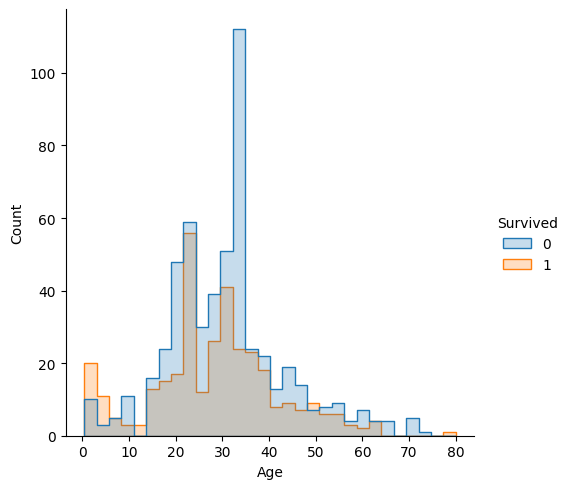

In [702]:
sns.displot(data=df_titanic_train, x='Age', hue='Survived', element='step')

#### Categorie di Age

Anziché usare le età esatte, per un modello migliore forse sarebbe più facile raggruppare le età in fasce di età. Questo dovrebbe permettere al modello di generalizzare meglio.

Sarà utile anche per noi, dato che ci sono molte età diverse e potrebbe essere difficile trovare un pattern o trarre conclusioni.

In [703]:
# potremmo creare delle fasce di età
bins = [0, 12, 18, 30, 50, 65, 100]
age_group_labels = ['child', 'teenager', 'young adult', 'adult', 'senior', 'old']
df_titanic_train['Age_group'] = pd.cut(df_titanic_train['Age'], bins, labels=age_group_labels)
df_titanic_test['Age_group'] = pd.cut(df_titanic_test['Age'], bins, labels=age_group_labels)

In [704]:
df_titanic_train.drop('Age', axis=1, inplace=True)
df_titanic_test.drop('Age', axis=1, inplace=True)

df_titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,Age_group
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891,891.000000,891,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,681,NaN,3,9,6
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,347082,NaN,S,U,adult
freq,NaN,NaN,NaN,1,577,NaN,NaN,7,NaN,646,687,376
mean,446.000000,0.383838,2.308642,NaN,NaN,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [705]:
df_titanic_test.info()
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Name          418 non-null    object  
 3   Sex           418 non-null    object  
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          418 non-null    float64 
 8   Embarked      418 non-null    object  
 9   Cabin_letter  418 non-null    object  
 10  Age_group     418 non-null    category
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 33.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survi

### Altre Features

Per le altre features, dobbiamo capire se hanno senso per il nostro modello. Faremo delle analisi per capire se sono rilevanti o meno, e se lo sono, se è opportuno fare delle trasformazioni.

In [706]:
df_titanic_train.drop('PassengerId', axis=1, inplace=True) # intanto questa: non ha senso come feature

In [707]:
# quelle categoriche le trasformiamo in numeriche

def extract_map(df_column):
    mapping = dict(enumerate(df_column.unique()))
    # transformare il dict 'sexes' così che valori diventano chiavi e viceversa
    return {v: k for k,v in mapping.items()}


sexes = extract_map(df_titanic_train['Sex'])
sexes

{'male': 0, 'female': 1}

In [708]:
port = extract_map(df_titanic_train['Embarked'])
port

{'S': 0, 'C': 1, 'Q': 2}

In [709]:
df_titanic_train['Sex'] = df_titanic_train['Sex'].map(sexes)

In [710]:
df_titanic_train['Embarked'] = df_titanic_train['Embarked'].map(port)

In [711]:
df_titanic_test['Sex'] = df_titanic_test['Sex'].map(sexes)
df_titanic_test['Embarked'] = df_titanic_test['Embarked'].map(port)

In [712]:
age_groups = {v: k for k,v in dict(enumerate(age_group_labels)).items()}
age_groups

{'child': 0,
 'teenager': 1,
 'young adult': 2,
 'adult': 3,
 'senior': 4,
 'old': 5}

In [713]:
df_titanic_train['Age_group'] = df_titanic_train['Age_group'].map(age_groups)
df_titanic_test['Age_group'] = df_titanic_test['Age_group'].map(age_groups)

In [714]:
deck = extract_map(df_titanic_train['Cabin_letter'])
deck

{'U': 0, 'C': 1, 'E': 2, 'G': 3, 'D': 4, 'A': 5, 'B': 6, 'F': 7, 'T': 8}

In [715]:
df_titanic_train['Deck'] = df_titanic_train['Cabin_letter'].map(deck)
df_titanic_test['Deck'] = df_titanic_test['Cabin_letter'].map(deck)
df_titanic_train.drop('Cabin_letter', axis=1, inplace=True)
df_titanic_test.drop('Cabin_letter', axis=1, inplace=True)

In [716]:
# Ticker non ha senso come feature
df_titanic_train.drop('Ticket', axis=1, inplace=True)
df_titanic_test.drop('Ticket', axis=1, inplace=True)

In [717]:
# Name non l'abbiamo usato o analizzato. Potrebbe essere interessante estrarre il titolo
df_titanic_train['Title'] = df_titanic_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_titanic_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [718]:
# uniformiamo i titoli
# Mlle e Ms sono titoli simili a Miss
# Mme è simile a Mrs
# Mr, Mrs, Miss, Master sono titoli comuni
# gli altri titoli verranno raggruppati in 'other'
def convert_title(title):
    if title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Mme':
        return 'Mrs'
    elif title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    else:
        return 'Other'
df_titanic_train['Title'] = df_titanic_train['Title'].apply(convert_title)

titles = extract_map(df_titanic_train['Title'])
titles

{'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4}

In [719]:
df_titanic_train['Title'] = df_titanic_train['Title'].map(titles)

In [720]:
df_titanic_test['Title'] = df_titanic_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_titanic_test['Title'] = df_titanic_test['Title'].apply(convert_title)
df_titanic_test['Title'] = df_titanic_test['Title'].map(titles)

df_titanic_train.drop('Name', axis=1, inplace=True)
df_titanic_test.drop('Name', axis=1, inplace=True)

In [721]:
df_titanic_train.describe(include='all')

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group,Deck,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.0,NaN,NaN
mean,0.383838,2.308642,0.352413,0.523008,0.381594,32.204208,0.361392,NaN,0.811448,0.794613
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.635673,NaN,1.815143,1.076519
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,0.000000,NaN,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,14.454200,0.000000,NaN,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,1.000000,NaN,0.000000,2.000000


In [722]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    int64   
 3   SibSp      891 non-null    int64   
 4   Parch      891 non-null    int64   
 5   Fare       891 non-null    float64 
 6   Embarked   891 non-null    int64   
 7   Age_group  891 non-null    category
 8   Deck       891 non-null    int64   
 9   Title      891 non-null    int64   
dtypes: category(1), float64(1), int64(8)
memory usage: 63.9 KB


In [723]:
df_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Fare         418 non-null    float64 
 6   Embarked     418 non-null    int64   
 7   Age_group    418 non-null    category
 8   Deck         418 non-null    int64   
 9   Title        418 non-null    int64   
dtypes: category(1), float64(1), int64(8)
memory usage: 30.1 KB


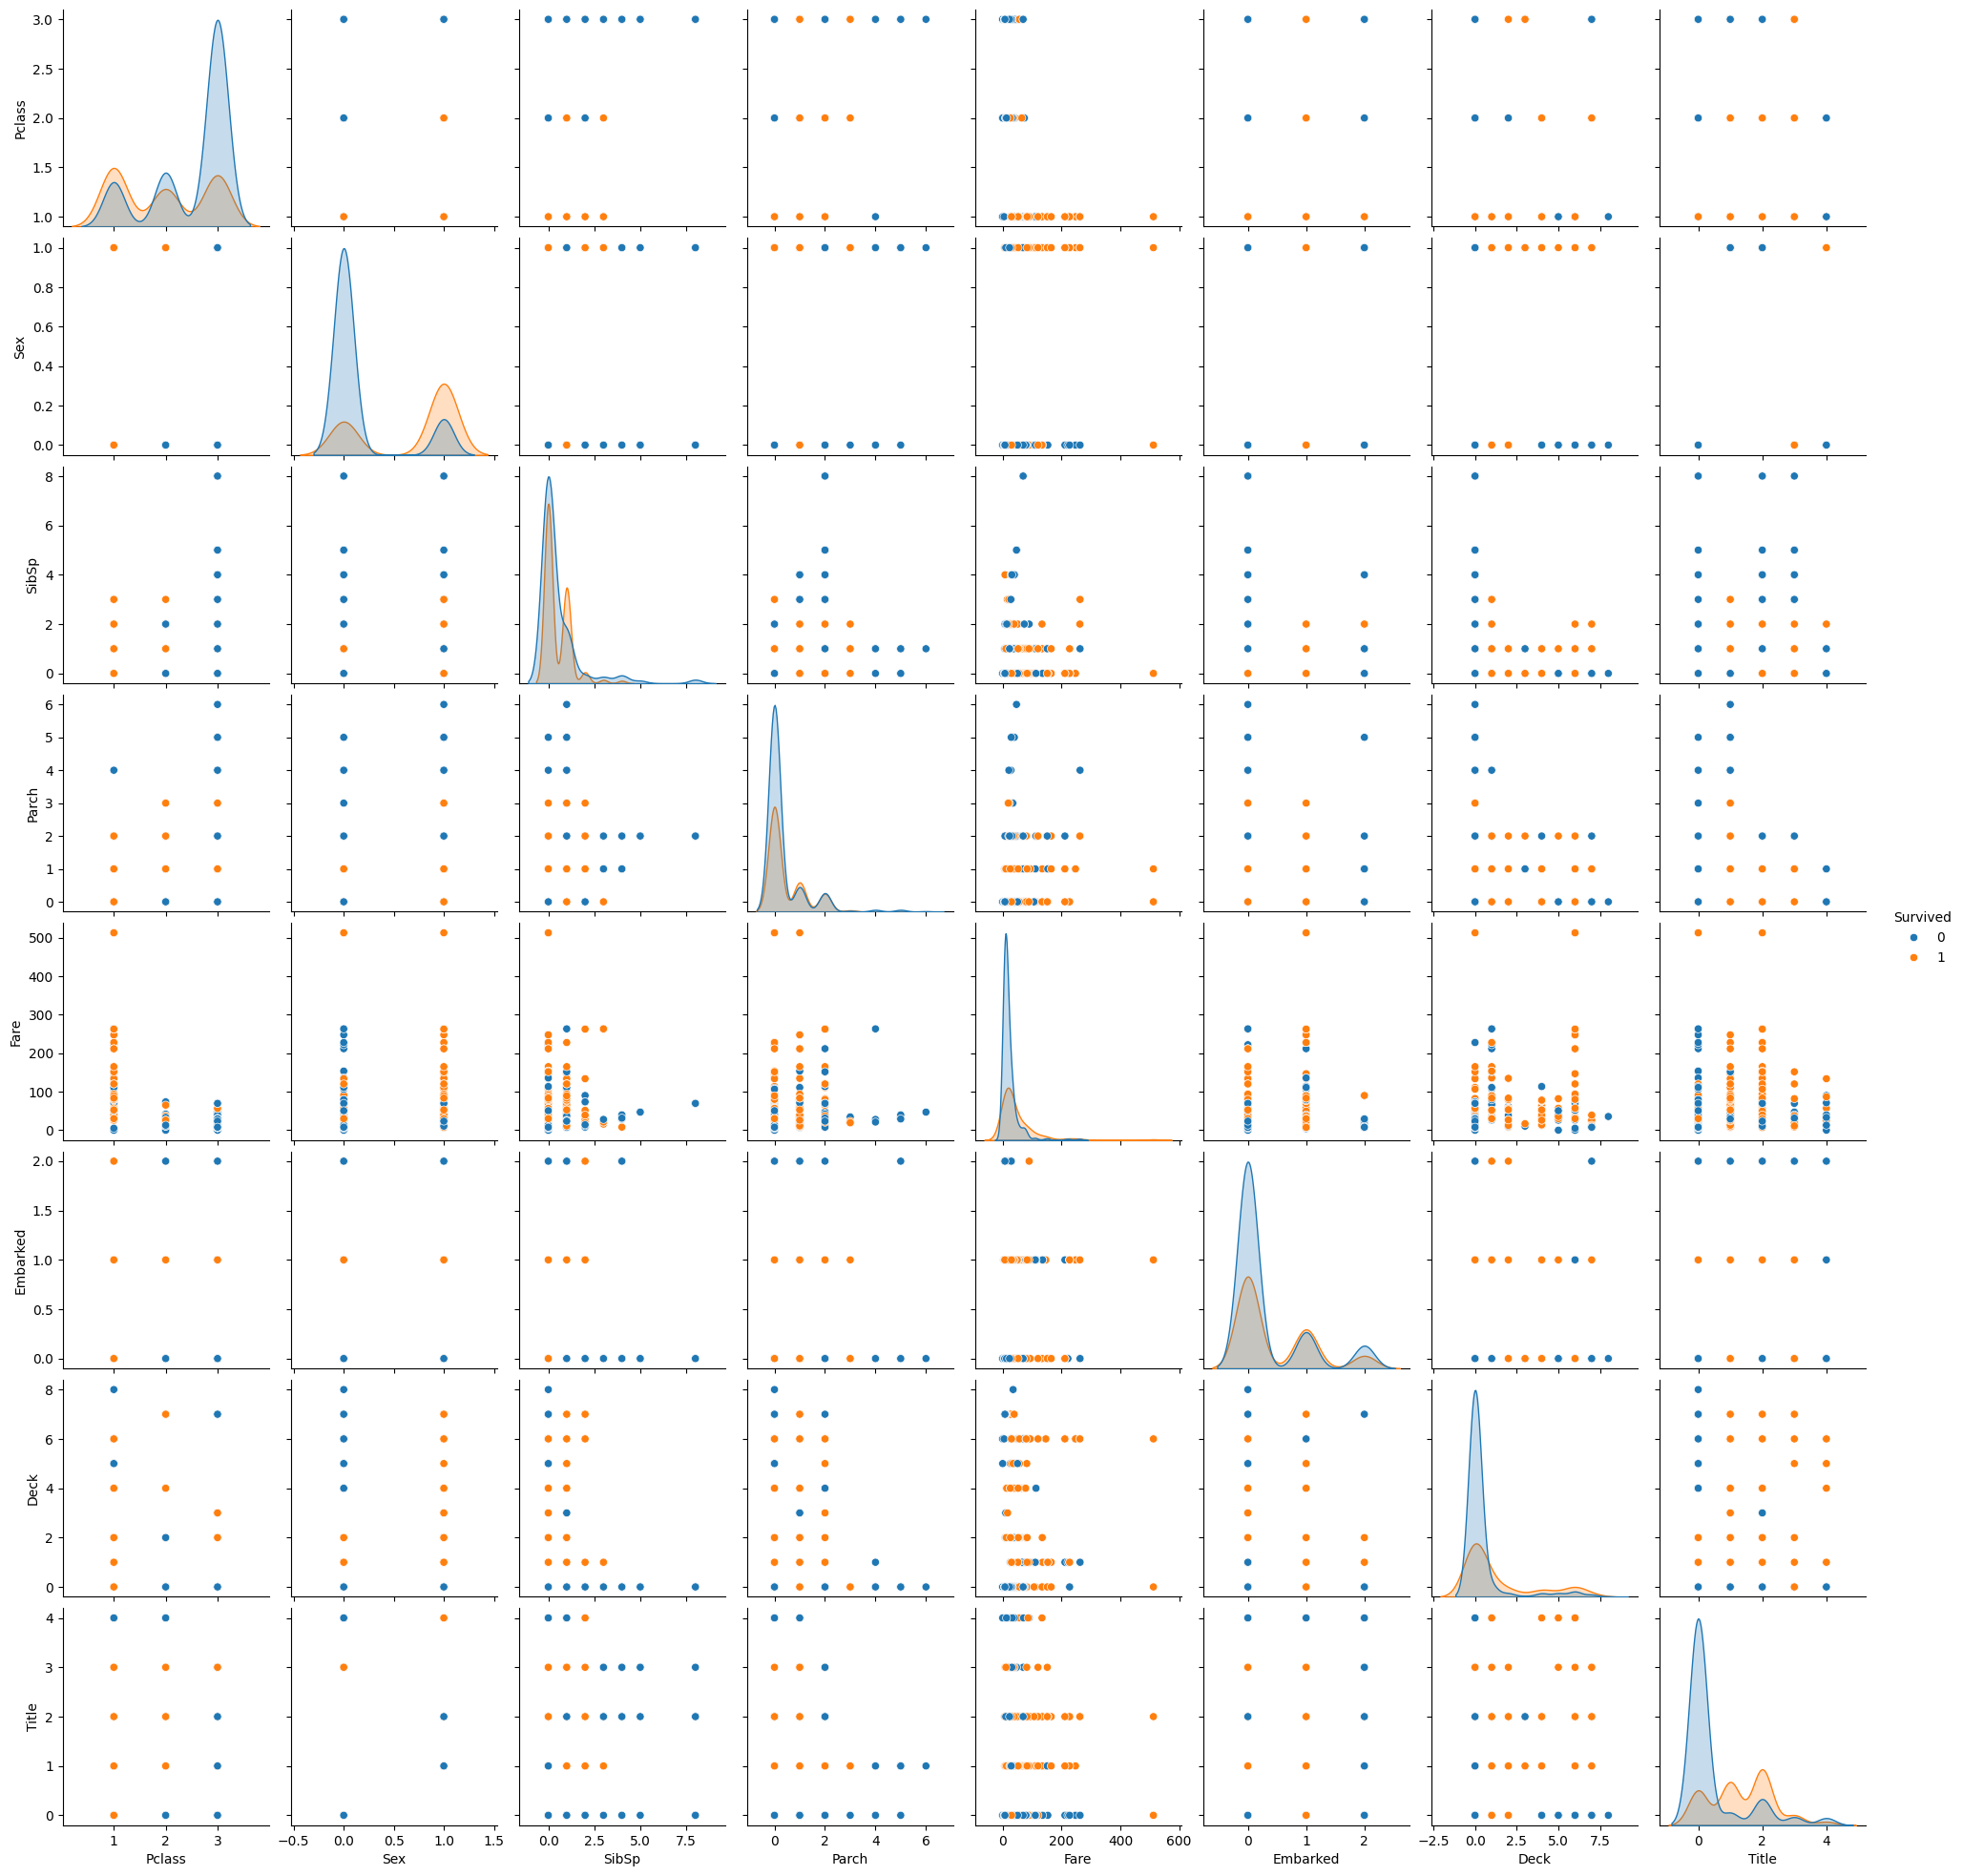

In [724]:
# facciamo un plot per iniziare a vedere le correlazioni tra le variabili
sns.pairplot(df_titanic_train, hue='Survived')

## ML

In [725]:
X_train = df_titanic_train.drop("Survived", axis=1)
Y_train = df_titanic_train["Survived"]
X_test  = df_titanic_test.drop("PassengerId", axis=1).copy()

In [726]:
scoring = {
    'Model': [],
    'Accuracy': []
} 

def add_score(model, accuracy):
    scoring['Model'].append(model.__class__.__name__)
    scoring['Accuracy'].append(accuracy)

In [727]:
def fit_score(model):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    return round(model.score(X_train, Y_train) * 100, 3)

In [728]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, tol=None)
acc_sgd = fit_score(sgd)

add_score(sgd, acc_sgd)

acc_sgd

77.666

In [729]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
acc_log = fit_score(logreg)

add_score(logreg, acc_log)

acc_log

81.145

In [730]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
acc_random_forest = fit_score(random_forest)

add_score(random_forest, acc_random_forest)

acc_random_forest

95.735

In [731]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
acc_knn = fit_score(knn)

add_score(knn, acc_knn)

acc_knn

85.859

In [732]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
acc_svc = fit_score(svc)

add_score(svc, acc_svc)

acc_svc

67.565

In [733]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
acc_linear_svc = fit_score(linear_svc)

add_score(linear_svc, acc_linear_svc)

acc_linear_svc

81.257

In [734]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
acc_gaussian = fit_score(gaussian)

add_score(gaussian, acc_gaussian)

acc_gaussian

78.227

In [735]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)
acc_perceptron = fit_score(perceptron)

add_score(perceptron, acc_perceptron)

acc_perceptron

c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


40.741

In [736]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
acc_decision_tree = fit_score(decision_tree)

add_score(decision_tree, acc_decision_tree)

acc_decision_tree

95.735

In [737]:
scores_df = pd.DataFrame(scoring)
scores_df = scores_df.sort_values(by='Accuracy', ascending=False)
print(scores_df.to_markdown(index=False))

| Model                  |   Accuracy |
|:-----------------------|-----------:|
| RandomForestClassifier |     95.735 |
| DecisionTreeClassifier |     95.735 |
| KNeighborsClassifier   |     85.859 |
| LinearSVC              |     81.257 |
| LogisticRegression     |     81.145 |
| GaussianNB             |     78.227 |
| SGDClassifier          |     77.666 |
| SVC                    |     67.565 |
| Perceptron             |     40.741 |


Da questi punteggi, possiamo vedere che il modello migliore è il Random Forest Classifier insieme al Decision Tree Classifier.

### Cross Validation

In [738]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [739]:
from sklearn.model_selection import cross_val_score, cross_validate
def fit_cvscore(model):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    return cross_val_score(model, X_train, Y_train, cv=5)

def fit_cvscores(model):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    return cross_validate(model, X_train, Y_train, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

In [740]:
cvresults = {
    'Model': [],
    'Score_mean': [],
    'Score_std': []
    }

def add_cvresult(model, score):
    cvresults['Model'].append(model.__class__.__name__)
    cvresults['Score_mean'].append(score.mean())
    cvresults['Score_std'].append(score.std())

cvscores = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'ROC_AUC': []
}

def add_cvscore(model, scores):
    cvscores['Model'].append(model.__class__.__name__)
    cvscores['Accuracy'].append(scores['test_accuracy'].mean())
    cvscores['Precision'].append(scores['test_precision'].mean())
    cvscores['Recall'].append(scores['test_recall'].mean())
    cvscores['F1'].append(scores['test_f1'].mean())
    cvscores['ROC_AUC'].append(scores['test_roc_auc'].mean())

In [741]:
add_cvresult(sgd, fit_cvscore(sgd))
add_cvresult(logreg, fit_cvscore(logreg))
add_cvresult(random_forest, fit_cvscore(random_forest))
add_cvresult(knn, fit_cvscore(knn))
add_cvresult(svc, fit_cvscore(svc))
add_cvresult(linear_svc, fit_cvscore(linear_svc))
add_cvresult(gaussian, fit_cvscore(gaussian))
add_cvresult(perceptron, fit_cvscore(perceptron))
add_cvresult(decision_tree, fit_cvscore(decision_tree))

c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteratio

In [742]:
add_cvscore(sgd, fit_cvscores(sgd))
add_cvscore(logreg, fit_cvscores(logreg))
add_cvscore(random_forest, fit_cvscores(random_forest))
add_cvscore(knn, fit_cvscores(knn))
add_cvscore(svc, fit_cvscores(svc))
add_cvscore(linear_svc, fit_cvscores(linear_svc))
add_cvscore(gaussian, fit_cvscores(gaussian))
add_cvscore(perceptron, fit_cvscores(perceptron))
add_cvscore(decision_tree, fit_cvscores(decision_tree))

c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\WilliamRussell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_mode

In [743]:
results_df = pd.DataFrame(cvresults)
results_df = results_df.sort_values(by='Score_mean', ascending=False)
print(results_df.to_markdown(index=False))

| Model                  |   Score_mean |   Score_std |
|:-----------------------|-------------:|------------:|
| RandomForestClassifier |     0.808047 |  0.0310269  |
| LogisticRegression     |     0.799077 |  0.0142533  |
| LinearSVC              |     0.797954 |  0.0140911  |
| DecisionTreeClassifier |     0.791256 |  0.0243659  |
| GaussianNB             |     0.776656 |  0.00416683 |
| KNeighborsClassifier   |     0.768809 |  0.0246144  |
| Perceptron             |     0.684609 |  0.0614495  |
| SGDClassifier          |     0.678984 |  0.0752623  |
| SVC                    |     0.667887 |  0.0452029  |


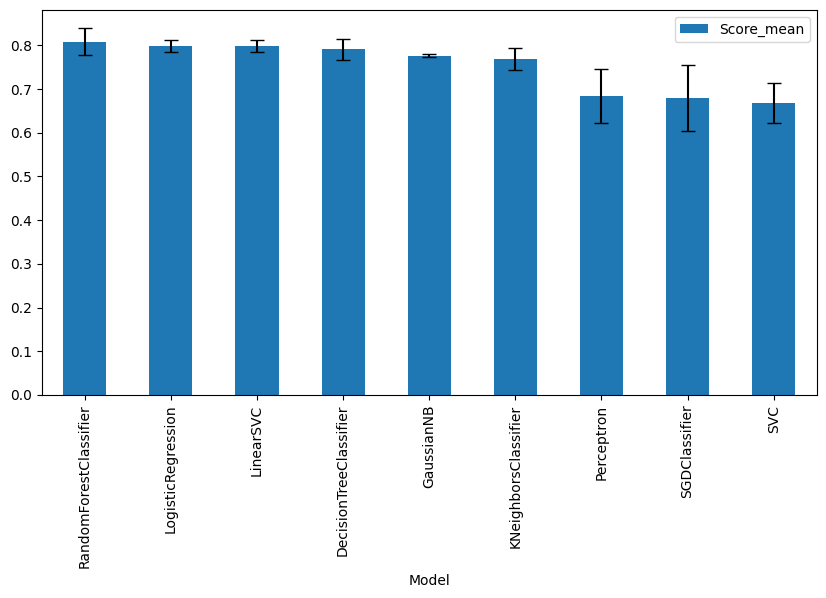

In [744]:
ax = results_df.plot.bar(x='Model', y='Score_mean', figsize=(10, 5), yerr='Score_std', capsize=5)
ax.tick_params(axis='x', rotation=90)

In [745]:
scores_df = pd.DataFrame(cvscores)
scores_df = scores_df.sort_values(by='Accuracy', ascending=False)
print(scores_df.to_markdown(index=False))

| Model                  |   Accuracy |   Precision |   Recall |       F1 |   ROC_AUC |
|:-----------------------|-----------:|------------:|---------:|---------:|----------:|
| RandomForestClassifier |   0.804695 |    0.754959 | 0.727877 | 0.739631 |  0.871156 |
| LogisticRegression     |   0.799077 |    0.753397 | 0.710443 | 0.730741 |  0.856067 |
| LinearSVC              |   0.797954 |    0.753087 | 0.704604 | 0.727743 |  0.855493 |
| DecisionTreeClassifier |   0.796855 |    0.742439 | 0.72208  | 0.73113  |  0.793093 |
| GaussianNB             |   0.776656 |    0.694964 | 0.74561  | 0.71933  |  0.824596 |
| KNeighborsClassifier   |   0.768809 |    0.691449 | 0.719352 | 0.704918 |  0.787808 |
| Perceptron             |   0.684609 |    0.381982 | 0.443052 | 0.397163 |  0.683491 |
| SVC                    |   0.667887 |    0.668343 | 0.269309 | 0.381214 |  0.771099 |
| SGDClassifier          |   0.639633 |    0.465751 | 0.633461 | 0.510894 |  0.699241 |


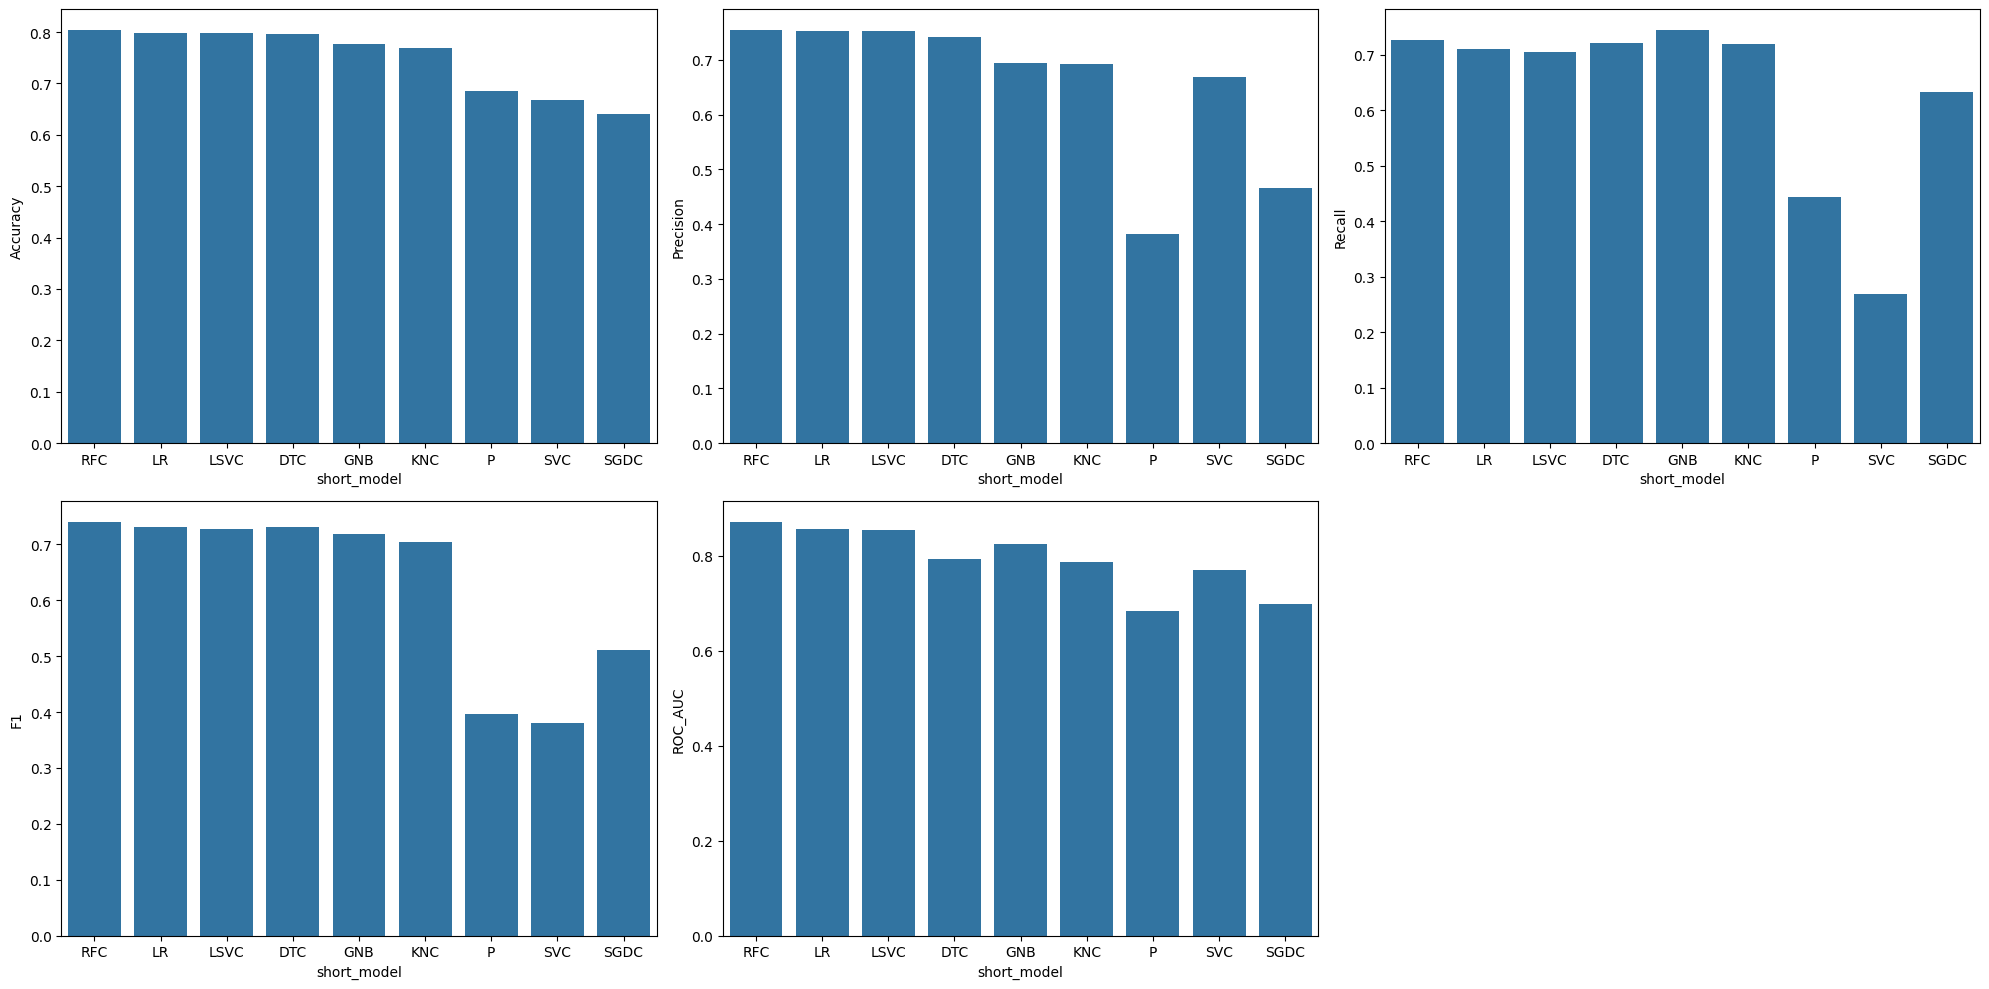

In [746]:
# plot scores
def get_short(model_name):
    # get capital letters
    return ''.join([c for c in model_name if c.isupper()])

scores_df['short_model'] = scores_df['Model'].apply(get_short)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.barplot(data=scores_df, x='short_model', y='Accuracy', ax=ax[0, 0])
sns.barplot(data=scores_df, x='short_model', y='Precision', ax=ax[0, 1])
sns.barplot(data=scores_df, x='short_model', y='Recall', ax=ax[0, 2])
sns.barplot(data=scores_df, x='short_model', y='F1', ax=ax[1, 0])
sns.barplot(data=scores_df, x='short_model', y='ROC_AUC', ax=ax[1, 1])

fig.delaxes(ax[1, 2])

fig.tight_layout()

Random Forest risulta un buon modello per questo problema, come dimostrato in questi grafici. I punteggi ottenuti sono i più alti tra i modelli testati in tutte le metriche usate.

Se dovessimo guardare solo i punteggi di Accuracy da scores_df, Random Forest e Decision Tree sembrano i migliori modelli. Tuttavia, se guardiamo anche le altre metriche, Random Forest è il migliore.

### Feature Importances

In [747]:
importances = pd.Series(random_forest.feature_importances_, index=random_forest.feature_names_in_)
importances

Pclass       0.078134
Sex          0.169250
SibSp        0.062809
Parch        0.038088
Fare         0.281340
Embarked     0.035821
Age_group    0.083708
Deck         0.069617
Title        0.181232
dtype: float64

Guardando le feature importances, possiamo vedere che le features più importanti sono Fare e Title. Questo è interessante, dato che non avevamo considerato Title come feature importante. Al terzo posto c'è Sex, che era una feature che avevamo considerato importante. Non risultano molto importanti Age_group, Deck e Pclass che sembravano più rilevanti. Questo potrebbe essere dovuto al fatto che Age_group e Deck sono state trasformate e potrebbero aver perso informazioni importanti, mentre Pclass potrebbe essere stata influenzata o oscurata da altre features.

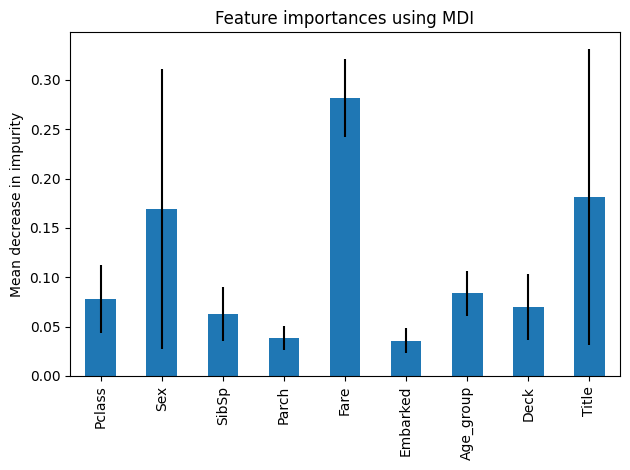

In [748]:
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

fig, ax = plt.subplots()
importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Output dei Risultati

In [749]:
y_pred = random_forest.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": df_titanic_test["PassengerId"],
    "Survived": y_pred
})
submission.to_csv('data/titanic/submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1
